# Titanic

Code to compete in the Titanic competition on Kaggle.

## Imports

In [1]:
# Standards
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Models
import sklearn
from sklearn.preprocessing import RobustScaler


In [2]:
np.__version__

'1.23.1'

In [3]:
train = pd.read_csv('/home/mattgpaul/Documents/Python Projects/Titanic/data/train.csv')

In [4]:
train['Sex'].isnull().values.any()

False

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

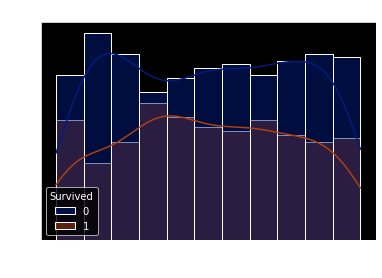

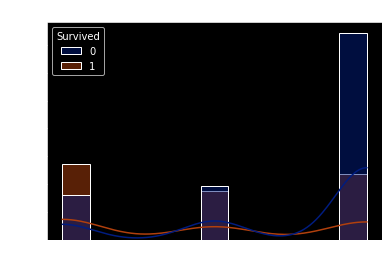

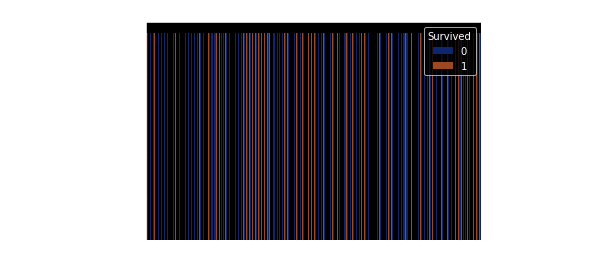

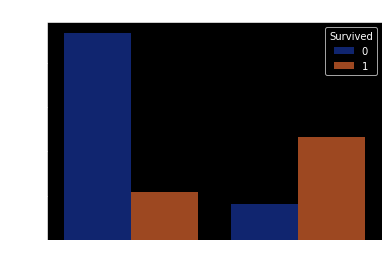

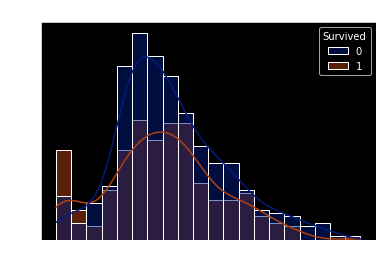

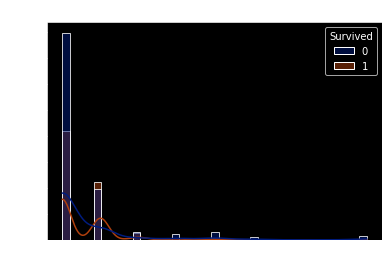

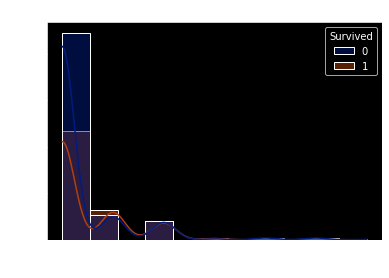

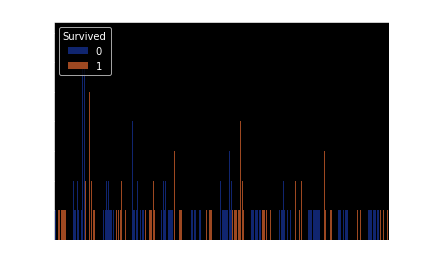

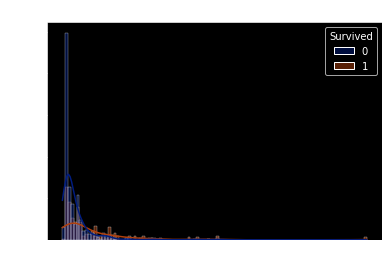

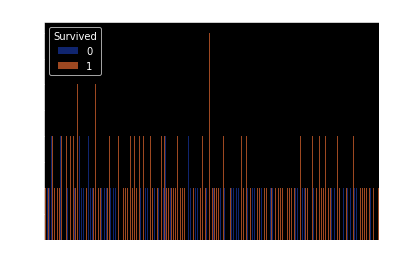

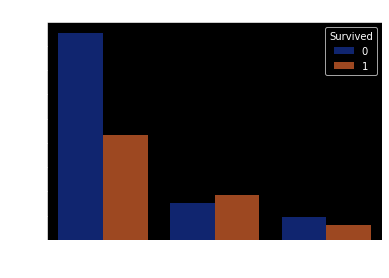

In [7]:
for col in [x for x in train.columns if x != 'Survived']:
    if train[col].dtype in ['int64','float64']:
        sns.histplot(data=train, x=col, hue='Survived', kde=True, palette='dark').set(title=col)
        plt.show()
    else:
        sns.countplot(data=train, x=col, hue='Survived', palette='dark').set(title=col)
        plt.show()

## Potential Features

Looks like the following are going to have the biggest impact on survival:
-  Pclass
-  Sex
-  Age
-  Pclass
-  Sbsp
-  Parch

Lets start here and adjust as needed

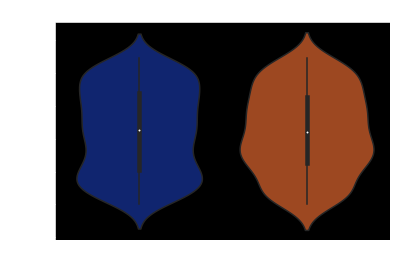

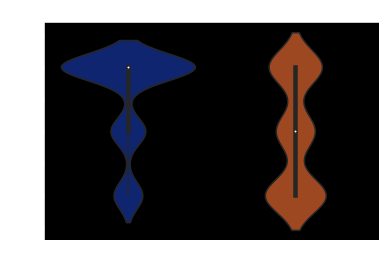

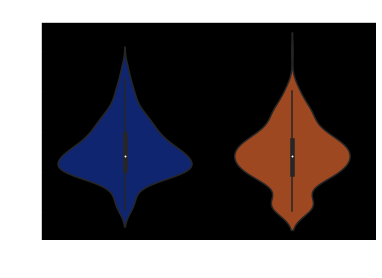

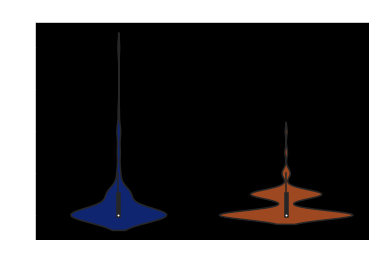

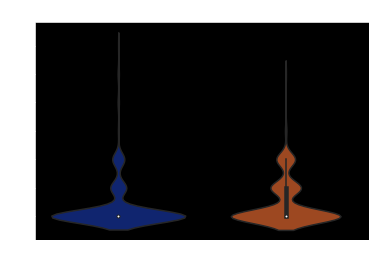

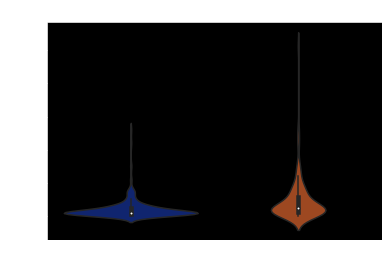

In [8]:
for col in [x for x in train.columns if x != 'Survived']:
    if train[col].dtype in ['int64','float64']:
        sns.violinplot(data=train, x='Survived', y=col, palette='dark').set(title=col)
        plt.show()


Too many outliers in the following that may affect the model:
-  Parch
-  Sbsp

We will drop these as features for now, though we may return and do some data wrangling if needed.